# CIS 5526 Project
Andy Gnias

## Project Overview

The pupose of this project is to use movie metadata to generate predictions about its IMDB rating. Movie metadata is available from several streaming sources via Kaggle, and will be augmented as necessasry.

## Explore Raw Data

First, we will explore the raw data easily given via Kaggle. Data is available from the following streaming services

* [Hulu](https://www.kaggle.com/datasets/octopusteam/full-hulu-dataset)
* [Amazon Prime](https://www.kaggle.com/datasets/octopusteam/full-amazon-prime-dataset)
* [Apple TV Plus](https://www.kaggle.com/datasets/octopusteam/full-apple-tv-dataset)
* [Netflix](https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset)
* [Max](https://www.kaggle.com/datasets/octopusteam/full-hbo-max-dataset)

To start, data from HBO Max will be examined.

In [1]:
import pandas as pd

max_df = pd.read_csv("raw_data/max.csv")
max_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517544.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,444345.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1105967.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259262.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,736401.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
...,...,...,...,...,...,...,...,...
5742,Girl Scout Cookie Championship,tv,Reality-TV,2020.0,tt11091964,4.9,10.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5743,An American Story,tv,Reality-TV,2021.0,tt15447994,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5744,NaN,tv,Reality,2010.0,NaN,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5745,7 Chances Para,tv,Comedy,2022.0,tt19514840,8.7,7.0,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."


We can start by filtering out anything that isn't `type=movie`. Release year should be an int as opposed to a float. If the relase year is not included, we set it to 0, and then use `0` as an identifier to drop the row. In a more sparse datset, it may make sense to analyze why the release year was missing and attempt to populate or interpolate the value. However, with the large amount of data expected from our sources, we can simply drop rows that are problematic and still be confident in developing a strong model.

In [2]:
max_df = max_df.fillna(0)  # https://stackoverflow.com/a/48511566/8728749
max_df = max_df.astype({"releaseYear": "int32"})
max_df = max_df[max_df.releaseYear != 0][max_df.type == 'movie']
max_df

/tmp/ipykernel_14147/1477598033.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_df = max_df[max_df.releaseYear != 0][max_df.type == 'movie']


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,517544.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,444345.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,tt0338013,8.3,1105967.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005,tt0399146,7.4,259262.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968,tt0062622,8.3,736401.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
...,...,...,...,...,...,...,...,...
3665,Donkey,movie,Drama,2021,0,0.0,0.0,"BA, BG, CZ, HR, HU, MD, ME, MK, PL, RO, RS, SI..."
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,388.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."
3667,Chris Brown: A History of Violence,movie,"Crime, Documentary",2024,tt33516233,5.4,188.0,"AG, BA, BB, BE, BG, BR, BS, BZ, CZ, DK, FI, FR..."
3668,drive.,movie,Documentary,2024,0,0.0,0.0,"DK, FI, FR, MC, NO, SE"


The `imdbId` is not correlated with the movie itself so should not be used as a feature. However, it could be useful to web scraping for more data, so we shouldn't drop it just yet. Some movies have an IMDB rating of `0.0`, indicating that the movie is not rated. These movies should be dropped.

In [3]:
max_df = max_df[max_df.imdbAverageRating != 0.0]
max_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,517544.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,444345.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,tt0338013,8.3,1105967.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005,tt0399146,7.4,259262.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968,tt0062622,8.3,736401.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
...,...,...,...,...,...,...,...,...
3660,Plastic People,movie,Documentary,2024,tt30835991,8.4,58.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3661,Casi el Paraíso,movie,"Comedy, Drama",2024,tt27836519,6.8,320.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3663,Gary,movie,"Biography, Documentary",2024,tt33084905,6.6,432.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,388.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


`imdbNumVotes` should be removed from the model, as it does not help us generate a model that predicts a rating of a movie that has not been seen yet. It is influenced by the performance of a movie after release, ex. many people will review a movie that is extremely good or extremely bad. `availableCountries` may also suffer from the same issue, ex. a highly rated movie will be relased to many countries. However, there are responsible ways of using this column. For example, a feature could be created to see if the movie was released to the US or not, as this is a large market and could indicate a movie's overall performance.

In [4]:
max_df = max_df.drop(["imdbNumVotes"], axis=1)
max_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,tt0338013,8.3,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005,tt0399146,7.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968,tt0062622,8.3,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
...,...,...,...,...,...,...,...
3660,Plastic People,movie,Documentary,2024,tt30835991,8.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3661,Casi el Paraíso,movie,"Comedy, Drama",2024,tt27836519,6.8,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3663,Gary,movie,"Biography, Documentary",2024,tt33084905,6.6,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


More actions will need to be taken before using this dataset in a model, ex. One-hot encoding of categorical variables. However, we're getting closer to a state where meaningful analysis can be performed. We can now add the other datasets to the dataframe using the same cleaning operations as were done before. Additionally, we should drop any rows where a critical piece of data is missing.

In [5]:
amazon = pd.read_csv("raw_data/amazon.csv")
apple = pd.read_csv("raw_data/apple.csv")
hulu = pd.read_csv("raw_data/hulu.csv")
netflix = pd.read_csv("raw_data/netflix.csv")
hbo_max = pd.read_csv("raw_data/max.csv")
df = pd.concat([amazon, apple, hulu, netflix, hbo_max])
df = df.fillna(0)
df = df.astype({"releaseYear": "int32"})
df = df[df.type == 'movie']
for attr in ["title", "releaseYear", "imdbAverageRating"]:
    df = df[df[attr] != 0]
df = df.drop(["imdbNumVotes"], axis=1)
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN"
...,...,...,...,...,...,...,...
3660,Plastic People,movie,Documentary,2024,tt30835991,8.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3661,Casi el Paraíso,movie,"Comedy, Drama",2024,tt27836519,6.8,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3663,Gary,movie,"Biography, Documentary",2024,tt33084905,6.6,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


We now have metadata from all 5 sources loaded into 1 dataframe. However, it's likely that there are some duplicates among the rows. Some candidates for a unique identifier include
* Title - should be included in every movie, but may include some discrepancies
* imdbId - should be unique for each movie, but may not be included for each movie

Since we are dealing with a large dataset, currently at 89037 samples, we can filter for uniqueness by both of these columns. However, in practice, filtering for the title is sufficient

In [6]:
df = df.drop_duplicates(subset=["title"])
print(df.shape[0])
df = df.drop_duplicates(subset=["imdbId"])
print(df.shape[0])
df

67676
67676


,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN"
...,...,...,...,...,...,...,...
3660,Plastic People,movie,Documentary,2024,tt30835991,8.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3661,Casi el Paraíso,movie,"Comedy, Drama",2024,tt27836519,6.8,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3663,Gary,movie,"Biography, Documentary",2024,tt33084905,6.6,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


## Statistics on Large Data

## Explore an individual data point



In [7]:
df.loc[[0]]

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA"


Looking at an individual movie, we can see that the movie can found on the IMDB website via `https://www.imdb.com/title/{imdbId}`

In [8]:
import requests
data = requests.get("https://www.imdb.com/title/tt0029927")
data.status_code

403

Viewing a movie doesn't require authentication as seems suggested by the 403 error. It's likely the site has some bot detection going on. Let's see if we can get around this. In a project in my personal GitHub, I worked around a similar issue by creating a session object and adding a user agent. This code, taken from `https://github.com/AGnias47/march-madness/blob/main/helpers/sessions.py`, is duplicated here.

In [9]:
from requests.adapters import HTTPAdapter, Retry
from requests_ratelimiter import LimiterSession


def limiting_retrying_session():
    session = LimiterSession(per_second=10)
    retry = Retry(total=3, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
    session.mount("http://", HTTPAdapter(max_retries=retry))
    session.headers.update(
        {
            "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) "
            "Gecko/20100101 Firefox/115.0"
        }
    )
    return session

session = limiting_retrying_session()
data = session.get("https://www.imdb.com/title/tt0029927")
data.status_code

200

We can see that we're now getting a 200 response. This data can be more easily parsed via the BeautifulSoup library. Again, this resembles data I've worked with in a personal project from `https://github.com/AGnias47/toolbox/blob/main/imdb/watchlist_selector.py` replicated here.

In [10]:
import json

from bs4 import BeautifulSoup

def get_movie_data(url):
    return json.loads(
        BeautifulSoup(session.get(url).text, "html.parser")
        .find("script", type="application/ld+json")
        .text
    )

get_movie_data("https://www.imdb.com/title/tt0029927")

{'@context': 'https://schema.org',
 '@type': 'Movie',
 'url': 'https://www.imdb.com/title/tt0029927/',
 'name': 'Blondie',
 'image': 'https://m.media-amazon.com/images/M/MV5BOGQyNjdkNzctZWYwNC00NGY1LWFmY2YtOTg4NWZlODZhYjBhXkEyXkFqcGc@._V1_.jpg',
 'description': 'Dagwood loses his job on the eve of his and Blondie&apos;s fifth wedding anniversary.',
 'review': {'@type': 'Review',
  'itemReviewed': {'@type': 'Movie',
   'url': 'https://www.imdb.com/title/tt0029927/'},
  'author': {'@type': 'Person', 'name': 'tavm'},
  'dateCreated': '2015-06-05',
  'inLanguage': 'English',
  'name': 'Blondie was a pretty good start for the movie series based on Chic Young&apos;s comic strip',
  'reviewBody': 'With this, the first in a movie series based on Chic Young&apos;s comic strip, Blondie has many elements and characters one associates with it like Dagwood often getting himself in hot water which his wife Blondie usually gets him out of though she isn&apos;t above some flaws herself when she jumps 

From here, we can see there's additional data we can get from the IMDB site. Let's attempt to add the director and runtime to the dataframe. First, we'll add the columns and initialize them as nil values

In [11]:
df['director'] = None  # https://stackoverflow.com/a/13843741/8728749
df['runtime'] = 0
df['contentRating'] = None
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",None,0,None
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,None,0,None
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",None,0,None
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,None,0,None
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",None,0,None
...,...,...,...,...,...,...,...,...,...,...
3660,Plastic People,movie,Documentary,2024,tt30835991,8.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC...",None,0,None
3661,Casi el Paraíso,movie,"Comedy, Drama",2024,tt27836519,6.8,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC...",None,0,None
3663,Gary,movie,"Biography, Documentary",2024,tt33084905,6.6,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT...",None,0,None
3666,Seth Myers: Dad Man Walking,movie,Comedy,2024,tt33749189,6.9,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL...",None,0,None


In [12]:
import tqdm

def get_movie_data(url):
    return json.loads(
        BeautifulSoup(session.get(url).text, "html.parser")
        .find("script", type="application/ld+json")
        .text
    )


def scrape_imdb_data(df):
    for i, row in tqdm.tqdm(df.iloc[0:].iterrows()):
        data = get_movie_data(f"https://www.imdb.com/title/{row.imdbId}")
        with open(f"cache/{row.imdbId}.json", "w") as F:
            json.dump(data, F)
        try:
            df.loc[i, "director"] = data.get("director")[0].get("name")
        except Exception as e:
            print(f"Error parsing director for {df.title}: {e}")
            pass
        try:
            df.loc[i, "runtime"] = data.get("duration", 0)
        except Exception as e:
            print(f"Error parsing runtime for {df.title}: {e}")
            pass
        try:
            df.loc[i, "contentRating"] = data.get("contentRating")
        except Exception as e:
            print(f"Error parsing contentRating for {df.title}: {e}")
            pass
        if i % 10:
            df.to_csv("backup.csv")
    return df


def main():
    session = limiting_retrying_session()
    df = pd.read_csv("backup.csv")
    df = scrape_imdb_data(df)
    df.to_csv("df.csv")

From here, we can run this code in a standalone script and reload the resulting dataframe.

In [13]:
df = pd.read_csv("df.csv")
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
0,0,0,0,0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",Frank R. Strayer,PT1H10M,Approved
1,1,1,1,1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,Aki Kaurismäki,PT1H12M,Not Rated
2,2,2,2,2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",Allison Anders,PT1H38M,R
3,3,3,3,3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,Stephen Hopkins,PT1H50M,R
4,4,4,4,4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",Robert Zemeckis,PT2H22M,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,62864,62864,62864,9606,Private Screening,movie,Drama,1973,tt0070566,6.0,"BG, CZ, DK, EE, FI, GR, HR, HU, IS, LI, LT, LV...",François Leterrier,PT1H35M,NaN
62865,62865,62865,62865,9609,Ang pangarap kong holdap,movie,"Action, Comedy",2018,tt9349770,6.9,PH,Marius Talampas,PT1H47M,NaN
62866,62866,62866,62866,9610,Struggle: The Life and Lost Art of Szukalski,movie,"Biography, Documentary",2018,tt9316022,7.9,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Ireneusz Dobrowolski,PT1H55M,TV-MA
62867,62867,62867,62867,9613,Fireplace for Your Home: Crackling Fireplace,movie,Documentary,2011,tt2244386,7.7,"AT, AU, CH, DE, DK, EE, GB, ID, IE, IN, LT, LV...",George Ford,PT1H1M,Not Rated


We end up with a few garbage columns, which can be dropped.

In [14]:
df = df.drop(["Unnamed: 0.3"], axis=1, errors='ignore')
df = df.drop(["Unnamed: 0.2"], axis=1, errors='ignore')
df = df.drop(["Unnamed: 0.1"], axis=1, errors='ignore')
df = df.drop(["Unnamed: 0"], axis=1, errors='ignore')
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",Frank R. Strayer,PT1H10M,Approved
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,Aki Kaurismäki,PT1H12M,Not Rated
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",Allison Anders,PT1H38M,R
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,Stephen Hopkins,PT1H50M,R
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",Robert Zemeckis,PT2H22M,PG-13
...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,movie,Drama,1973,tt0070566,6.0,"BG, CZ, DK, EE, FI, GR, HR, HU, IS, LI, LT, LV...",François Leterrier,PT1H35M,NaN
62865,Ang pangarap kong holdap,movie,"Action, Comedy",2018,tt9349770,6.9,PH,Marius Talampas,PT1H47M,NaN
62866,Struggle: The Life and Lost Art of Szukalski,movie,"Biography, Documentary",2018,tt9316022,7.9,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Ireneusz Dobrowolski,PT1H55M,TV-MA
62867,Fireplace for Your Home: Crackling Fireplace,movie,Documentary,2011,tt2244386,7.7,"AT, AU, CH, DE, DK, EE, GB, ID, IE, IN, LT, LV...",George Ford,PT1H1M,Not Rated


We can convert the movie duration to an `int` representing minutes.

In [15]:
import isodate

# Apply usage: https://stackoverflow.com/a/34962199/8728749resulting
# Exception Handling: https://stackoverflow.com/a/42395924/8728749

def duration_to_minute(x):
    try:
        return round(isodate.parse_duration(x).seconds / 60)
    except:
        return 0


df['runtime'] = df['runtime'].apply(lambda x: duration_to_minute(x))
df = df[df.runtime > 0]
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",Frank R. Strayer,70,Approved
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,Aki Kaurismäki,72,Not Rated
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",Allison Anders,98,R
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,Stephen Hopkins,110,R
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",Robert Zemeckis,142,PG-13
...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,movie,Drama,1973,tt0070566,6.0,"BG, CZ, DK, EE, FI, GR, HR, HU, IS, LI, LT, LV...",François Leterrier,95,NaN
62865,Ang pangarap kong holdap,movie,"Action, Comedy",2018,tt9349770,6.9,PH,Marius Talampas,107,NaN
62866,Struggle: The Life and Lost Art of Szukalski,movie,"Biography, Documentary",2018,tt9316022,7.9,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Ireneusz Dobrowolski,115,TV-MA
62867,Fireplace for Your Home: Crackling Fireplace,movie,Documentary,2011,tt2244386,7.7,"AT, AU, CH, DE, DK, EE, GB, ID, IE, IN, LT, LV...",George Ford,61,Not Rated


We can see which ratings were found and drop any rows with bad or missing data. Most of the ratings seem valid, and the 'TV' ones seem to represent movies that premiered on TV.

In [16]:
df.contentRating.unique()

array(['Approved', 'Not Rated', 'R', 'PG-13', 'PG', 'G', nan, 'NC-17',
       'GP', 'TV-MA', 'Passed', 'TV-G', 'Unrated', 'TV-PG', 'TV-14',
       'M/PG', 'M', 'TV-Y7-FV', '16+', 'TV-Y', 'TV-13', 'TV-Y7', '13+',
       'X', '18+', 'E', 'MA-13', 'MA-17', '12', '18', 'E10+'],
      dtype=object)

We find 111 movies without a genre, which we can drop without negatively impacting our dataset.

In [17]:
df[df.genres == '0']

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
18072,Living the Blues,movie,0,1986,tt0143424,6.7,IS,Alan Gorg,80,G
22022,Naughty New Orleans,movie,0,1954,tt0163762,4.5,"GB, GG, IE",Sidney Baldwin,87,NaN
23632,Austen Country: The Life & Times of Jane Austen,movie,0,2002,tt4285896,7.0,"AU, FI, GH, KE, NG, NO, NZ, PH, SE, UG",Liam Dale,56,Not Rated
23820,Bhagapirivinai,movie,0,1959,tt0156350,7.1,"BZ, CM, GY, MW, PG",A. Bhimsingh,161,NaN
23983,Aa Divasom,movie,0,1982,tt0247907,5.8,"GB, GG, IE, IN",M. Mani,130,Not Rated
...,...,...,...,...,...,...,...,...,...,...
57469,Yakuza Ladies 6,movie,0,1996,tt0327790,5.3,JP,Sadao Nakajima,114,NaN
57819,The Greatest Challenge of All,movie,0,1967,tt4370626,6.2,JP,Yôji Yamada,92,NaN
58092,Shin Tokyo koshin-kyoku,movie,0,1953,tt0427854,6.9,JP,Yûzô Kawashima,97,NaN
58141,We Make Antiques! Osaka Dreams,movie,0,2023,tt23220464,5.5,JP,Masaharu Take,112,NaN


In [18]:
df = df[df.genres != '0']

## Data Analysis

We can start to take a closer look at the data. Generating a histogram, we can see that the dataset strongly favors movies created in the past 20 years.

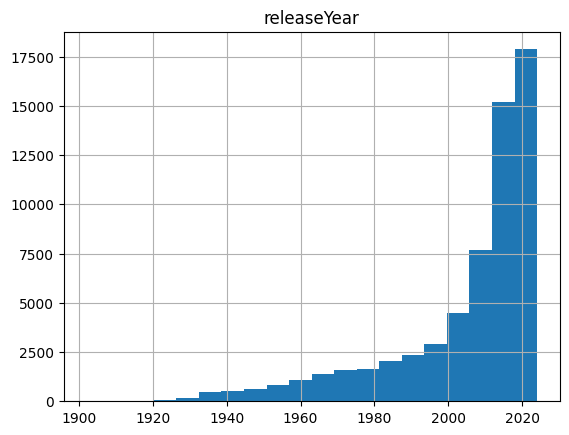

In [19]:
df[['releaseYear']].hist(bins=20);

Looking at genres, there are over 1000 unique values. The best way to handle this would be via a 1-hot encoding for each genre. Movies with multiple genres listed would have multipe encodings. For example, a movie listed as `Comedy,Romance` would have a value in the `Comedy` column and a value in the `Romance` column as opposed to creating a column called `comedy_romance`.

In [20]:
len(df.genres.unique())

1000

We can get a more discrete list by finding each individual genre name available.

In [21]:
all_genres = set()
for i, row in df.iterrows():
    for genre in row.genres.split(","):
        all_genres.add(genre.strip())
all_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Science Fiction',
 'Short',
 'Sport',
 'TV Movie',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [22]:
len(all_genres)

30

From here, we get a list of 30 genres, which will be very manageable for a 1-hot encoding.

The data for ratings is a much more normal distribution, with a bulk of reviews being 6-7.

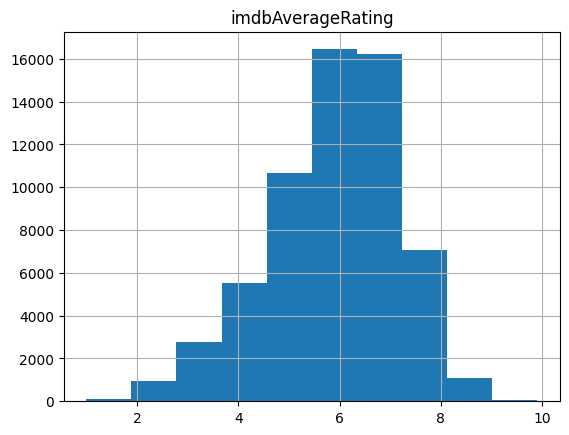

In [23]:
df[['imdbAverageRating']].hist(bins=10);

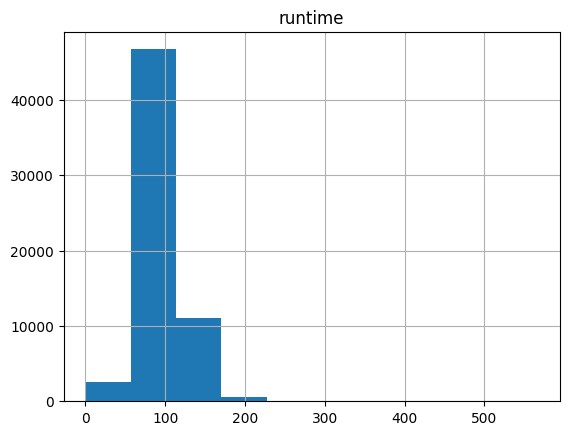

In [24]:
df[['runtime']].hist(bins=10);

We specify 10 bins, but see that several bins were dedicated to movies that are 300+ minutes, which is rare in reality. We should examine these movies further.

In [25]:
df[df.runtime > 270]

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
1019,1900,movie,"Drama, History",1976,tt0074084,7.6,ES,Bernardo Bertolucci,317,Unrated
1996,Until the End of the World,movie,"Action, Drama, Sci-Fi",1991,tt0101458,6.8,JP,Wim Wenders,287,R
2476,Legenda o Tile,movie,"Adventure, History",1977,tt0074784,7.5,"CH, LI",Aleksandr Alov,311,NaN
5584,War and Peace,movie,"Drama, Romance, War",1965,tt0063794,8.3,"AG, JM, TT",Sergey Bondarchuk,393,GP
6530,The Deluge,movie,"Adventure, History, Romance",1974,tt0072021,7.7,"AT, DE",Jerzy Hoffman,287,NaN
7538,Napoleon,movie,"Biography, Drama, History",1927,tt0018192,8.2,"AT, DE",Abel Gance,330,NaN
8317,Little Dorrit,movie,"Drama, Romance",1987,tt0095530,7.2,US,Christine Edzard,357,G
16411,Heaven's Story,movie,Drama,2010,tt1685536,7.3,"CA, US",Takahisa Zeze,278,Not Rated
21037,Custer's Last Stand,movie,"War, Western",1936,tt0027488,4.7,US,Elmer Clifton,328,Approved
22775,The Vatican Museums,movie,Documentary,2007,tt2291996,5.2,"DK, FI, IS, NO, SE",Luca De Mata,410,NaN


These seem like legitimate runtimes and not a data error. For example, `Gangs of Wasseypur` is in fact a 5+ hour movie. These should be kept in the dataset.

Looking at the number of directors, we find 31,212 unique values. If these values are one-hot encoded, we should still end up with a matrix with more rows than columns, preventing any rank issues.

In [26]:
len(df.director.unique())

31175

Plotting content ratings, most movies are not rated.

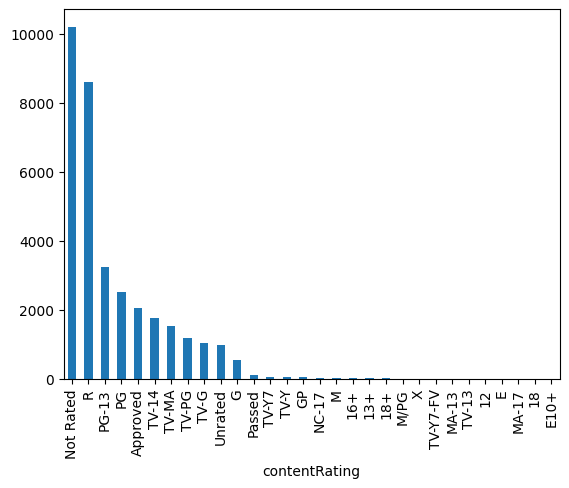

In [27]:
df.contentRating.value_counts().plot(kind='bar');

From here, we should have enough information to generate a finalized matrix to use in models.

## Prep DF

In [28]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",Frank R. Strayer,70,Approved
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,Aki Kaurismäki,72,Not Rated
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",Allison Anders,98,R
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,Stephen Hopkins,110,R
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",Robert Zemeckis,142,PG-13
...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,movie,Drama,1973,tt0070566,6.0,"BG, CZ, DK, EE, FI, GR, HR, HU, IS, LI, LT, LV...",François Leterrier,95,NaN
62865,Ang pangarap kong holdap,movie,"Action, Comedy",2018,tt9349770,6.9,PH,Marius Talampas,107,NaN
62866,Struggle: The Life and Lost Art of Szukalski,movie,"Biography, Documentary",2018,tt9316022,7.9,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Ireneusz Dobrowolski,115,TV-MA
62867,Fireplace for Your Home: Crackling Fireplace,movie,Documentary,2011,tt2244386,7.7,"AT, AU, CH, DE, DK, EE, GB, ID, IE, IN, LT, LV...",George Ford,61,Not Rated


### Encode genres

We can use the list of 30 discrete genres we generated and create one-hot encoding columns with them.

In [29]:
for genre in all_genres:
    df[f"is_{genre.lower()}"] = 0
for i, row in df.iterrows():
    for genre in row.genres.split(","):
        df.loc[i, f"is_{genre.strip().lower()}"] = 1
df

/tmp/ipykernel_14147/3773396828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"is_{genre.lower()}"] = 0
/tmp/ipykernel_14147/3773396828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"is_{genre.lower()}"] = 0
/tmp/ipykernel_14147/3773396828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,title,type,genres,releaseYear,imdbId,imdbAverageRating,availableCountries,director,runtime,contentRating,...,is_talk-show,is_thriller,is_fantasy,is_music,is_game-show,is_action,is_history,is_short,is_biography,is_animation
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,"US, ZA",Frank R. Strayer,70,Approved,...,0,0,0,0,0,0,0,0,0,0
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,JP,Aki Kaurismäki,72,Not Rated,...,0,0,0,0,0,0,0,0,0,0
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,"AT, DE",Allison Anders,98,R,...,0,0,0,0,0,0,0,0,0,0
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,US,Stephen Hopkins,110,R,...,0,0,0,0,0,1,0,0,0,0
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,"AD, AT, CU, DE, IN, JP, SN",Robert Zemeckis,142,PG-13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,movie,Drama,1973,tt0070566,6.0,"BG, CZ, DK, EE, FI, GR, HR, HU, IS, LI, LT, LV...",François Leterrier,95,NaN,...,0,0,0,0,0,0,0,0,0,0
62865,Ang pangarap kong holdap,movie,"Action, Comedy",2018,tt9349770,6.9,PH,Marius Talampas,107,NaN,...,0,0,0,0,0,1,0,0,0,0
62866,Struggle: The Life and Lost Art of Szukalski,movie,"Biography, Documentary",2018,tt9316022,7.9,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Ireneusz Dobrowolski,115,TV-MA,...,0,0,0,0,0,0,0,0,1,0
62867,Fireplace for Your Home: Crackling Fireplace,movie,Documentary,2011,tt2244386,7.7,"AT, AU, CH, DE, DK, EE, GB, ID, IE, IN, LT, LV...",George Ford,61,Not Rated,...,0,0,0,0,0,0,0,0,0,0


We can now safely drop the `genres` column.

In [30]:
df = df.drop(["genres"], axis=1, errors='ignore')

We also want to drop `availableCountries`, as it reles too much on what happened with a movie after it was released. We want to focus our model on attributes that can be known before anyone sees a movie.

We can drop `type`, as we know all of these are movies from our previous filtering.

We can drop `imdbId`, as this was only used to get more movie data.

We can leave the `title`, as this is our identifier, but we will need to exclude this column before passing the matrix into our model.

In [31]:
df = df.drop(["availableCountries", "type", "imdbId"], axis=1, errors='ignore')
df

,title,releaseYear,imdbAverageRating,director,runtime,contentRating,is_western,is_war,is_film-noir,is_documentary,...,is_talk-show,is_thriller,is_fantasy,is_music,is_game-show,is_action,is_history,is_short,is_biography,is_animation
0,Blondie,1938,6.9,Frank R. Strayer,70,Approved,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ariel,1988,7.4,Aki Kaurismäki,72,Not Rated,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Four Rooms,1995,6.7,Allison Anders,98,R,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Judgment Night,1993,6.6,Stephen Hopkins,110,R,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Forrest Gump,1994,8.8,Robert Zemeckis,142,PG-13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,1973,6.0,François Leterrier,95,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62865,Ang pangarap kong holdap,2018,6.9,Marius Talampas,107,NaN,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62866,Struggle: The Life and Lost Art of Szukalski,2018,7.9,Ireneusz Dobrowolski,115,TV-MA,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
62867,Fireplace for Your Home: Crackling Fireplace,2011,7.7,George Ford,61,Not Rated,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We should normalize the release year, as it starts in the early 1900s and ends in present day. The time itself is meaningless, so normalizing is useful here as well as for the runtime.

In [32]:
# Same process as was used in HW4
for field in ["releaseYear", "runtime"]:
    df[field] = df[field].apply(lambda r: (r - df[field].mean()) / df[field].std())
df

,title,releaseYear,imdbAverageRating,director,runtime,contentRating,is_western,is_war,is_film-noir,is_documentary,...,is_talk-show,is_thriller,is_fantasy,is_music,is_game-show,is_action,is_history,is_short,is_biography,is_animation
0,Blondie,-3.302359,6.9,Frank R. Strayer,-1.100754,Approved,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ariel,-0.826621,7.4,Aki Kaurismäki,-1.019797,Not Rated,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Four Rooms,-0.480018,6.7,Allison Anders,0.032648,R,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Judgment Night,-0.579047,6.6,Stephen Hopkins,0.518392,R,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Forrest Gump,-0.529533,8.8,Robert Zemeckis,1.813709,PG-13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,Private Screening,-1.569343,6.0,François Leterrier,-0.088788,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62865,Ang pangarap kong holdap,0.658822,6.9,Marius Talampas,0.396956,NaN,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62866,Struggle: The Life and Lost Art of Szukalski,0.658822,7.9,Ireneusz Dobrowolski,0.720785,TV-MA,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
62867,Fireplace for Your Home: Crackling Fireplace,0.312218,7.7,George Ford,-1.465062,Not Rated,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Lastly, we want to one-hot encode the remaining categorical fields, director and content rating. One-hot encoding `director` will give us more than 30k columns. For now, we will leave it of our analysis.

In [33]:
df = df.join(pd.get_dummies(df.contentRating, prefix="content_rating", dtype=str))
df = df.drop(["contentRating"], axis=1, errors='ignore')
# df = df.join(pd.get_dummies(df.director, prefix="directed_by", dtype=str))
df = df.drop(["director"], axis=1, errors='ignore')
df = df.fillna(0)

The model is now in a trainable state and can be saved.

In [34]:
df.to_csv("df_1123_3.csv")